## Example Code to Generate Figures
An example script of how to load the pickled results generated by transchannel.py.
After running the transchannel.py script, the results can be plotted with matplotlib.
Additionally, we included methods that analyze the results of the experimental validation in order to generate Figure 6.
Specific compound identifiers and rankings are proprietary and hidden. Summary results are shown here. 

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pickle

In [ ]:
def autolabel(rects, ax):
    """
    Helper function to attach a text label above each bar in *rects*, displaying its height.
    """
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', fontname="Times New Roman", fontsize=12)        

In [ ]:
def performanceBarCharts():
    """
    plots bar charts for pearson performance and MSE performance of the ML model
    """ 
    ##Pearson results  
    pickles_dir = "/Users/student/Desktop/Keiser Lab/lab-notebook-wong/ImageMuts/pickles/"
    width = .50
    fig, ax = plt.subplots()
    xlabels = ["null", "ML Model", "Null YFP Model", "Null DAPI Model"]
    model_perf = pickle.load(open(pickles_dir + "/ML_model_pearson_performance.pkl", "rb"))
    YFP_null_perf =  pickle.load(open(pickles_dir + "YFP_model_pearson_performance.pkl", "rb"))
    DAPI_perf =  pickle.load(open(pickles_dir + "DAPI_model_pearson_performance.pkl", "rb"))
    plt.cla()
    plt.clf()
    width = .50
    fig, ax = plt.subplots()
    xlabels = ["null", "ML Model", "Null YFP Model", "Null DAPI Model"]
    y = np.array([model_perf[0], YFP_null_perf[0], DAPI_perf[0]]).round(decimals=2)
    stds = [model_perf[1], YFP_null_perf[1], DAPI_perf[1]]
    x = [1, 2, 3]
    rects = ax.bar(x, y, width, yerr=stds, capsize=3,  error_kw=dict(lw=1, capsize=3, capthick=1), color="cornflowerblue", zorder=3)
    for i,j in zip(x, y):
        ax.annotate(str(j)[0:4],xy=(i - .20, j +.03),fontsize=12, fontname="Times New Roman")
    plt.title("Pearson Performance",fontname="Times New Roman", fontsize=14)
    ax.set_ylabel("Pearson Correlation Coefficient", fontname="Times New Roman", fontsize=12)
    plt.yticks(fontname="Times New Roman", fontsize=12)
    ax.set_xticklabels(xlabels,fontsize=12, fontname="Times New Roman")
    ax.set_ylim((0,1))
    ax.yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.25, zorder=0)
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    plt.show()

    ##MSE results
    width = .50
    fig, ax = plt.subplots()
    xlabels = ["null", "ML Model", "Null YFP Model", "Null DAPI Model"]
    model_perf = pickle.load(open(pickles_dir + "ML_model_MSE_performance.pkl", "rb"))
    YFP_null_perf =  pickle.load(open(pickles_dir + "YFP_model_MSE_performance.pkl", "rb"))
    DAPI_perf =  pickle.load(open(pickles_dir + "DAPI_model_MSE_performance.pkl", "rb"))
    np.array([model_perf[0], YFP_null_perf[0], DAPI_perf[0]]).round(decimals=2)
    stds = [model_perf[1], YFP_null_perf[1], DAPI_perf[1]]
    x = [1, 2, 3]
    rects = ax.bar(x, y, width, yerr=stds, capsize=3, error_kw=dict(lw=1, capsize=3, capthick=1), color="slategrey", zorder=3)
    for i,j in zip(x, y):
        ax.annotate(str(j)[0:4],xy=(i - .20, j +.03),fontsize=12, fontname="Times New Roman")
    plt.title("MSE Performance",fontname="Times New Roman", fontsize=14)
    ax.set_ylabel("MSE", fontname="Times New Roman", fontsize=12)
    plt.yticks(fontname="Times New Roman", fontsize=12)
    ax.set_xticklabels(xlabels,fontsize=12, fontname="Times New Roman")
    ax.set_ylim((0,2))
    ax.yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.25, zorder=0)
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    plt.show()

performanceBarCharts()
    
    

In [ ]:
def ROC_plot():
    """
    plot ROC for ML model trained for archival HCS validation results, plus Null Models
    """
    fig, ax = plt.subplots()
    colors = {"ML": "gold", "YFP": "blue", "DAPI": "red"}
    pickles_dir = "pickles/"
    x_ML_hist = pickle.load(open(pickles_dir + "mapp_x_values_fold_-1.pk", "rb")) 
    y_ML_hist = pickle.load(open(pickles_dir + "mapp_y_values_fold_-1.pk", "rb")) 
    x_null_hist = pickle.load(open(pickles_dir + "null_YFP_mapp_x_values_fold_-1.pk", "rb"))
    y_null_hist = pickle.load(open(pickles_dir + "null_YFP_mapp_y_values_fold_-1.pk", "rb"))
    x_null_DAPI_hist = pickle.load(open(pickles_dir + "null_DAPI_mapp_x_values_fold_-1.pk", "rb"))
    y_null_DAPI_hist = pickle.load(open(pickles_dir + "null_DAPI_mapp_y_values_fold_-1.pk", "rb"))
    ML_auc = -1 * np.trapz(y_ML_hist, x_ML_hist)
    null_auc = -1 * np.trapz(y_null_hist, x_null_hist)
    null_DAPI_auc = -1 * np.trapz(y_null_DAPI_hist, x_null_DAPI_hist)
    ax.plot(x_ML_hist,y_ML_hist,linewidth=2.0, color=colors["ML"], label="ML Model, AUC = {}".format(str(round(ML_auc, 2))[0:4])) #rounded AUC
    ax.plot(x_null_hist,y_null_hist,linewidth=2.0, color=colors["YFP"], label="Null YFP Model, AUC = {}".format(str(round(null_auc, 2))[0:4]))
    ax.plot(x_null_DAPI_hist,y_null_DAPI_hist,linewidth=2.0, color=colors["DAPI"], label="Null DAPI Model, AUC = {}".format(str(round(null_DAPI_auc, 2))[0:4]))
    plt.title("ROC Curves", fontname="Times New Roman", fontsize=12)
    ax.set_xlabel("FPR", fontname="Times New Roman", fontsize=12)
    ax.set_ylabel("TPR",fontname="Times New Roman", fontsize=12)
    ax.plot([0, .5, 1], [0,.5, 1], linestyle="--", linewidth=1.0, color="black")
    ax.set_xlim((0,1))
    ax.set_ylim((0,1))
    ax.legend(loc='lower right',prop={"family":"Times New Roman", "size":10})
    plt.rc('font',family='Times New Roman')
    plt.xticks(fontname="Times New Roman", fontsize=12)
    plt.yticks(fontname="Times New Roman", fontsize=12)
    plt.savefig("matplotlib_figures/ROC_{}.png".format(validation), dpi=300)

## Experimental Validation Analysis

1921 1921
HIST AUC:  0.8609027161098696
ML AUC:  0.9316379336742506


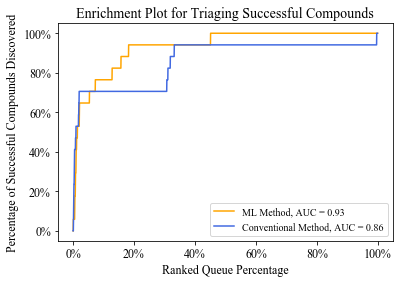

In [5]:
def enrichmentPlot(labelScheme):
    """
    Given LABELSCHEME of "Strict Labeling Successful Compounds" or "Strict Labeling Missed Successful Compounds", 
    will construct an enrichment plot
    """
    fig, ax = plt.subplots()
    x1 = range(0, 1921)
    #strict labeling
    if labelScheme == "Strict Labeling Successful Compounds":
        plt.title("Enrichment Plot for Triaging Successful Compounds", fontname="Times New Roman", fontsize=14)
        
        historic_hits = [2,3,4,5,7,8,9,15,18,34,36,38,1915,613,598,591,638]
        ML_hits = [1,10,11,14,15,18,19,22,27,39,40,302,103,246,140,867,350]
        historic_fraction = float(1/len(historic_hits))
        ML_fraction = float(1/len(ML_hits))

    if labelScheme == "Strict Labeling Missed Successful Compounds":
        plt.title("Enrichment Plot for Triaging Missed Successful Compounds", fontname="Times New Roman", fontsize=14)
        historic_hits = [1915,613,591,598,638]
        ML_hits = [302,103,246,140,867,350]

        historic_fraction = float(1/len(historic_hits))
        ML_fraction = float(1/len(ML_hits))
    
    cumulative_summation = 0
    historic_plot = []
    for i in range(0, 1921):
        if i in historic_hits:
            cumulative_summation += historic_fraction
        historic_plot.append(cumulative_summation)
    cumulative_summation = 0
    ML_plot = []
    for j in range(0, 1921):
        if j in ML_hits:
            cumulative_summation += ML_fraction
        ML_plot.append(cumulative_summation)
    
    x1 = np.arange(0, 1, float(1/1921))
    print(len(x1), len(historic_plot))
    hist_AUC = np.trapz(historic_plot, x1)
    print("HIST AUC: ", hist_AUC)
    ML_AUC = np.trapz(ML_plot, x1)
    print("ML AUC: ", ML_AUC)
    ax.plot(x1, ML_plot, color = "orange", label="ML Method, AUC = " + str(ML_AUC)[0:4])
    ax.plot(x1, historic_plot, color = "royalblue", label="Conventional Method, AUC = " + str(hist_AUC)[0:4])
    ax.set_xlabel("Ranked Queue Percentage", fontname="Times New Roman", fontsize=12)
    ax.set_ylabel("Percentage of Successful Compounds Discovered", fontname="Times New Roman", fontsize=12)
    plt.legend(loc='lower right', prop={"family":"Times New Roman", "size":10})
    plt.rc('font',family='Times New Roman')
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontname="Times New Roman", fontsize=12)
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals], fontname="Times New Roman", fontsize=12)
    plt.show()
    
enrichmentPlot("Strict Labeling Successful Compounds")

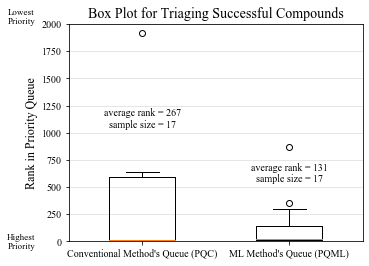

In [7]:
def enrichmentBoxPlot(labelScheme):
    fig, ax = plt.subplots()
    x1 = range(0, 1921)
    #strict labeling
    if labelScheme == "Strict Labeling Successful Compounds":
        plt.title("Box Plot for Triaging Successful Compounds", fontname="Times New Roman", fontsize=14)
        historic_hits = [2,3,4,5,7,8,9,15,18,34,36,38,1915,613,598,591,638]
        ML_hits = [1,10,11,14,15,18,19,22,27,39,40,302,103,246,140,867,350]

    if labelScheme == "Strict Labeling Missed Successful Compounds":
        plt.title("Box Plot for Triaging Missed Successful Compounds", fontname="Times New Roman", fontsize=14)
       
        historic_hits = [1915,638,613,598,591]
        ML_hits = [302,103,246,140,867,350]

    hist_avg, hist_sample_size, hist_Q3 = np.mean(historic_hits), len(historic_hits), np.quantile(historic_hits, .75)
    ml_avg, ml_sample_size, ml_Q3 =  np.mean(ML_hits), len(ML_hits), np.quantile(ML_hits, .75)
    ax.boxplot([historic_hits, ML_hits],  widths=(.45, .45))
    
    hist_text_height =  1000
    ml_text_height = 500

    ##data labels
    ax.annotate("average rank = {:.0f}\nsample size = {}".format(hist_avg, hist_sample_size),
        xy=(1, hist_text_height), xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom', fontname="Times New Roman", fontsize=10)
    ax.annotate("average rank = {:.0f}\nsample size = {}".format(ml_avg, ml_sample_size),
        xy=(2, ml_text_height), xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom', fontname="Times New Roman", fontsize=10)
    
    ##axis labels for low and high priority
    plt.gcf().text(.11, .88, "Lowest\nPriority", ha='center', fontname="Times New Roman", fontsize=9)
    plt.gcf().text(.11, .1, "Highest\nPriority", ha='center', fontname="Times New Roman", fontsize=9)

    xlabels = ["null", "Conventional Method's Queue (PQC)", "ML Method's Queue (PQML)"]
    ax.set_ylabel("Rank in Priority Queue", fontname="Times New Roman", fontsize=12)
    plt.yticks(fontname="Times New Roman", fontsize=10)
    ax.set_xticklabels(xlabels,fontsize=10, fontname="Times New Roman")
    ax.set_ylim((0,2000))
    ax.yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.25, zorder=0)
    ax.xaxis.set_major_locator(plt.MaxNLocator(2))
    plt.gcf().subplots_adjust(left=.22) #default: left = 0.125, right = 0.9, bottom = 0.1, top = 0.9
    plt.show()
    
enrichmentBoxPlot("Strict Labeling Successful Compounds")